In [22]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [23]:
df = pd.read_csv('resized_data2.csv')

In [24]:
df.head(5)

,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Primary Type_ARSON,Primary Type_ASSAULT,Primary Type_BATTERY,...,IUCR_5094,IUCR_5110,IUCR_5111,IUCR_5112,IUCR_5113,IUCR_5114,IUCR_5121,IUCR_5130,IUCR_5131,IUCR_5132
0,0,0,0.550457,0.542373,1.025482,-0.582108,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1.260365,1.266538,1.822943,1.844403,0.807598,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1.131685,1.121705,1.532957,-1.468719,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-0.027879,-0.036959,0.083027,-0.535445,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,-0.314156,-0.326625,-1.439399,1.097784,0.807598,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Confusion Matrix (Reduced Dataset):


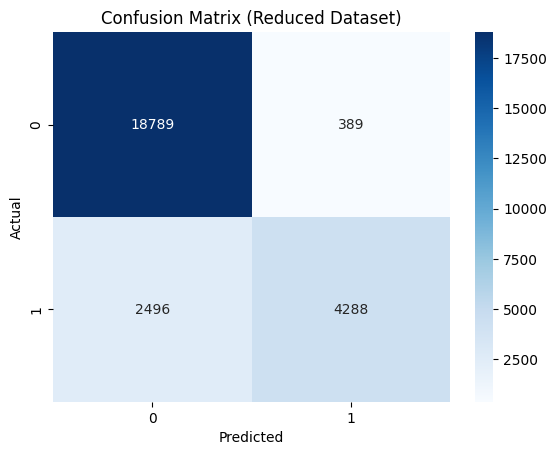


Confusion Matrix (10,000 Rows):


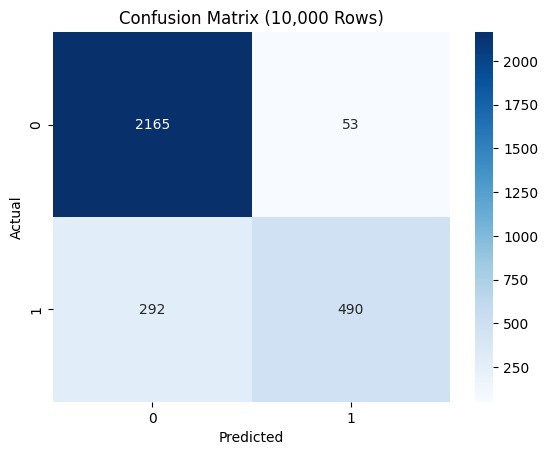


Confusion Matrix (5,000 Rows):


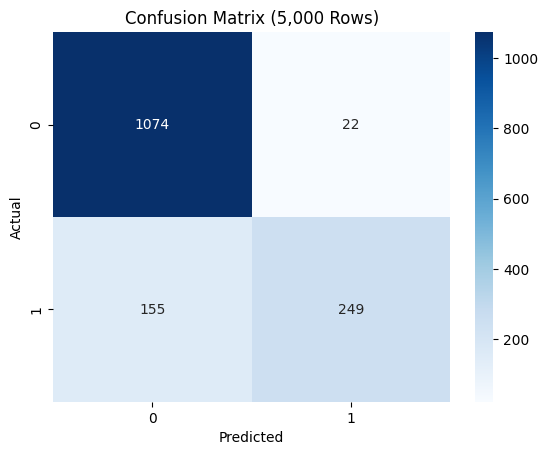


Model Performance Summary:
        Dataset  Accuracy  Precision   Recall  F1 Score
Reduced Dataset  0.888876   0.916827 0.632075  0.748277
    10,000 Rows  0.885000   0.902394 0.626598  0.739623
     5,000 Rows  0.882000   0.918819 0.616337  0.737778


In [25]:
target_column = 'Arrest'

# features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# function to evaluate model and return metrics
def evaluate_model(X_train, X_test, y_train, y_test, label):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\nConfusion Matrix ({label}):")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({label})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        'Dataset': label,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    }

# split and evaluate for each dataset size
results = []

# reduced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
results.append(evaluate_model(X_train, X_test, y_train, y_test, "Reduced Dataset"))

# 10,000 random Rows
df_10k = df.sample(n=10000, random_state=42)
X_10k = df_10k.drop(columns=[target_column])
y_10k = df_10k[target_column]
X_train, X_test, y_train, y_test = train_test_split(X_10k, y_10k, test_size=0.3, random_state=42)
results.append(evaluate_model(X_train, X_test, y_train, y_test, "10,000 Rows"))

# 5,000 random Rows
df_5k = df.sample(n=5000, random_state=42)
X_5k = df_5k.drop(columns=[target_column])
y_5k = df_5k[target_column]
X_train, X_test, y_train, y_test = train_test_split(X_5k, y_5k, test_size=0.3, random_state=42)
results.append(evaluate_model(X_train, X_test, y_train, y_test, "5,000 Rows"))

# final results
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df.to_string(index=False))



Confusion Matrix for Reduced Dataset


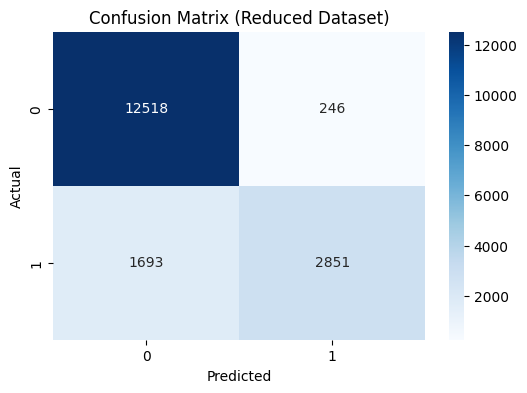


Confusion Matrix for 10,000 Rows


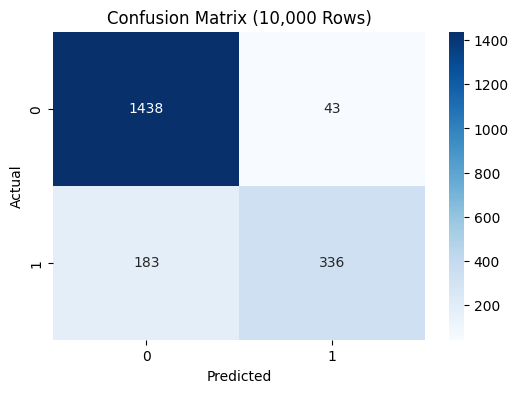


Confusion Matrix for 5,000 Rows


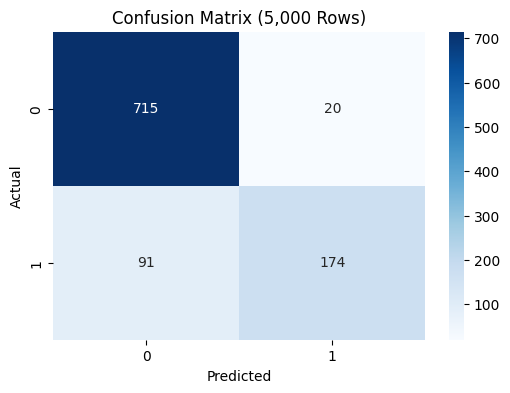


Tuned Model Performance Summary:
           Dataset  Accuracy  Precision    Recall  F1 Score
0  Reduced Dataset  0.887971   0.920568  0.627421  0.746237
1      10,000 Rows  0.887000   0.886544  0.647399  0.748330
2       5,000 Rows  0.889000   0.896907  0.656604  0.758170


In [32]:
def tune_and_evaluate(X_train, X_test, y_train, y_test, label):
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    grid = GridSearchCV(
        LogisticRegression(max_iter=1000),
        param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\nConfusion Matrix for {label}")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({label})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return {
        'Dataset': label,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
    }

results = []

# reduced dataset
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)
results.append(tune_and_evaluate(X_train_full, X_test_full, y_train_full, y_test_full, "Reduced Dataset"))

# 10,000 rows
df_10k = df.sample(n=10000, random_state=42)
X_10k = pd.get_dummies(df_10k.drop(columns=[target_column]), drop_first=True)
y_10k = df_10k[target_column]
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(X_10k, y_10k, test_size=0.2, random_state=42)
results.append(tune_and_evaluate(X_train_10k, X_test_10k, y_train_10k, y_test_10k, "10,000 Rows"))

# 5,000 rows
df_5k = df.sample(n=5000, random_state=42)
X_5k = pd.get_dummies(df_5k.drop(columns=[target_column]), drop_first=True)
y_5k = df_5k[target_column]
X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(X_5k, y_5k, test_size=0.2, random_state=42)
results.append(tune_and_evaluate(X_train_5k, X_test_5k, y_train_5k, y_test_5k, "5,000 Rows"))

results_df = pd.DataFrame(results)
print("\nTuned Model Performance Summary:")
print(results_df[['Dataset', 'Accuracy', 'Precision', 'Recall', 'F1 Score']])
